# Козловский Евгений

# Машинное обучение, ФЭН ВШЭ

# Практическое задание 2
(Основано на материалах курса машинного обучения на фкн)

## Общая информация

Дата выдачи: 21.09.2017

Срок сдачи: 8.10.2017 23:59MSK

### О задании

Практическое задание 1 посвящено изучению основных библиотек для анализа данных, а также линейных моделей и методов их обучения. Вы научитесь:
 * применять библиотеку NumPy;
 * подготавливать данные для обучения линейных моделей;
 * обучать линейную, Lasso и Ridge-регрессии при помощи модуля scikit-learn;
 * реализовывать обычный и стохастический градиентные спуски;
 * обучать линейную регрессию для произвольного функционала качества.
 

### Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Кроме того, некоторые из заданий являются опциональными (необязательными), однако за их выполнение можно получить дополнительные баллы.


Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце Вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник). 

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Для сдачи задания переименуйте получившийся файл \*.ipynb в соответствии со следующим форматом: *HW1_Username.ipynb*, где *Username* — Ваша фамилия и инициалы на латинице (например, *HW1_IvanovII.ipynb*). Далее отправьте этот файл на почту курса, указав соответствующую тему (см. вики-страничку курча).

## Библиотеки для анализа данных

### NumPy

Во всех заданиях данного раздела запрещено использовать циклы  и list comprehensions. Под вектором и матрицей в данных заданиях понимается одномерный и двумерный numpy.array соответственно.

In [1]:
import numpy as np

**1. (0.3 балла)** Реализуйте функцию, возвращающую максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой. Для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответом является 5. Если нулевых элементов нет, функция должна возвращать None.


Только хардкор:)

In [2]:
def max_element(arr):
    def max_auxillary(arr, c):
      if arr[0]!=0 and len(arr)>1:
        arr=arr[1:]
        return max_auxillary(arr, c)
      elif arr[0]==0 and len(arr)>1:
            if arr[1]>c:
                c=arr[1]
                arr=arr[1:]
                return max_auxillary(arr, c)
            else:
                arr=arr[1:]
                return max_auxillary(arr, c)
      else:
        print(c)
    
    if arr[0]!=0 and len(arr)>1:
        arr=arr[1:]
        return max_element(arr)
    elif arr[0]==0 and len(arr)>1:
        c=arr[1]
        arr=arr[1:]
        return max_auxillary(arr, c)
    else:
        print(None)

In [3]:
max_element(np.array([1,0,0,5]))

5


**2. (0.3 балла)** Реализуйте функцию, принимающую на вход матрицу и некоторое число и возвращающую ближайший к числу элемент матрицы. Например: для X = np.arange(0,10).reshape((2, 5)) и v = 3.6 ответом будет 4.

In [84]:
def nearest_value(X, v):  
    def nearest_auxillary1(x, v, c):
        if abs(x[0]-v)<abs(c-v):
            c=x[0]
            if len(x)>1:
                x=x[1:]
                return nearest_auxillary1(x, v, c)
            else:
                return c
        else:
            if len(x)>1:
                x=x[1:]
                return nearest_auxillary1(x, v, c)
            else:
                return c
            
    def nearest_auxillary2(X, v, c):
       if X.shape[0]>1:
         c=nearest_auxillary1(X[0], v, c)
         X=X[1:]
         return nearest_auxillary2(X, v, c)
       else:
         c=nearest_auxillary1(X[0], v, c)
         return c   
    
    c=X[0][0]
    print(nearest_auxillary2(X, v, c))

In [86]:
X = np.arange(10,20).reshape((5, 2))

In [87]:
nearest_value(X, 11.7)

12


**3. (0.3 балла)** Реализуйте функцию scale(X), которая принимает на вход матрицу и масштабирует каждый ее столбец (вычитает выборочное среднее и делит на стандартное отклонение). Убедитесь, что в функции не будет происходить деления на ноль. Протестируйте на случайной матрице (для её генерации можно использовать, например, функцию [numpy.random.randint](http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randint.html)).

In [88]:
def scale(X):
  def scale1(X,Z):
    if X.shape[1]>1:
      if np.std(X[:,0])!=0:
        X[:,0]=(X[:,0]-np.mean(X[:,0]))/float(np.std(X[:,0]))
      else:
        X[:,0]=X[:,0]-np.mean(X[:,0])
      Z=np.concatenate((Z, X[:,0].reshape(len(X[:,0]),1)), axis=1)
      X=X[:,1:]
      return scale1(X,Z)
    else:
      if np.std(X[:,0])!=0:
        X[:,0]=X[:,0]-np.mean(X[:,0])/float(np.std(X[:,0]))
      else:
        X[:,0]=X[:,0]-np.mean(X[:,0])
      Z=np.concatenate((Z, X[:,0].reshape(len(X[:,0]),1)), axis=1)
      return Z[:,1:]
  return scale1(X.astype(float),X[:,0].reshape(len(X[:,0]),1).astype(float))

In [91]:
y = np.random.randint(2,15, size=(5, 2))
y

array([[ 4,  6],
       [ 6,  6],
       [12,  7],
       [ 4,  6],
       [10, 12]])

In [92]:
scale(y)

array([[-0.98473193,  2.82727617],
       [-0.36927447,  2.82727617],
       [ 1.47709789,  3.82727617],
       [-0.98473193,  2.82727617],
       [ 0.86164044,  8.82727617]])

**4. (0.3 балла)** Реализуйте функцию, которая для заданной матрицы находит:
 - определитель
 - след
 - наименьший и наибольший элементы
 - норму Фробениуса
 - собственные числа
 - обратную матрицу

Для тестирования сгенерируйте матрицу с элементами из нормального распределения $\mathcal{N}$(10,1)

In [220]:
def get_stats(X):
    print('Определитель = '+str(np.linalg.det(X)))
    print('След = '+str(np.trace(X)))
    print('Max = '+str(np.amax(X))+'; min = '+str(np.amin(X)))
    print('Норма Фробениуса = '+str(np.linalg.norm(X, 'fro')))
    print('Собственные числа: \n'+str(np.linalg.eigvals(X)))
    print('Обратная матрица:\n '+str(np.linalg.inv(X)))

In [221]:
X = np.random.normal(10, 1, size=(5,5))
get_stats(X)

Определитель = -289.095132546
След = 46.4893454873
Max = 12.5200419177; min = 8.30956141266
Норма Фробениуса = 50.9510599849
Собственные числа: 
[ 50.65102494  -2.92398223  -1.65520926  -0.89708336   1.31459539]
Обратная матрица:
 [[-1.40149968  1.03462934  0.30630526 -0.26938461  0.29987684]
 [-0.17462689 -0.21073709  0.28429963  0.11424578 -0.01492068]
 [ 0.83492771 -0.62909976  0.26850415  0.10224889 -0.55786574]
 [ 0.55187116 -0.28067721 -0.28390255 -0.0816644   0.163214  ]
 [ 0.21616092  0.11360132 -0.57991532  0.15020934  0.14495412]]


**5. (0.3 балла)** Повторите 100 раз следующий эксперимент: сгенерируйте две матрицы размера 10×10 из стандартного нормального распределения, перемножьте их (как матрицы) и найдите максимальный элемент. Какое среднее значение по экспериментам у максимальных элементов? 95-процентная квантиль?

In [222]:
s = []
for exp_num in range(100):
    A = np.random.normal(0, 1, size=(10,10))
    B = np.random.normal(0, 1, size=(10,10))
    s.append(np.amax((np.dot(A, B))))
print('Среднее = '+str(np.mean(s)))
print('95% персентиль = '+str(np.percentile(s, 95)))

Среднее = 8.29641511399
95% персентиль = 10.8904021471


## Линейная регрессия

В этой части мы разберемся с линейной регрессией, способами её обучения и измерением качества ее прогнозов. 

Будем рассматривать данные по авиарейсам в США за январь-апрель 2008 года для предсказания времени задержки отправления рейса в минутах (DepDelay). Отметим, что под задержкой подразумевается не только опоздание рейса относительно планируемого времени вылета, но и отправление до планируемого времени.


[Данные](https://www.dropbox.com/s/dvfitn93obn0rql/2008.csv?dl=0) и их [описание](http://stat-computing.org/dataexpo/2009/the-data.html)

### Подготовка данных

**6. (0.75 балла)** Считайте выборку из файла при помощи функции pd.read_csv и ответьте на следующие вопросы:
   - Имеются ли в данных пропущенные значения?
   - Сколько всего пропущенных элементов в таблице "объект-признак"?
   - Сколько объектов имеют хотя бы один пропуск?
   - Сколько признаков имеют хотя бы одно пропущенное значение?

In [2]:
import pandas as pd
df = pd.read_csv('2008_data.csv')
df.head()

/Users/macbook/anaconda/lib/python3.5/site-packages/pandas/computation/__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,6,18,3,2111.0,2055,2308.0,2300,WN,242,...,3.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,6,4,3,1426.0,1410,1730.0,1728,XE,2380,...,4.0,12.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,8,3,7,1143.0,1145,1501.0,1520,WN,1769,...,4.0,9.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,23,3,1141.0,1144,1323.0,1335,OO,3802,...,4.0,19.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,5,4,7,815.0,820,1243.0,1300,WN,399,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN


Проверим, есть ли вообще в датасете пропущенные значения?

In [3]:
df.isnull().values.any()

True

Посчитаем количество пропущенных элементов в таблице "объект-признак"

In [4]:
df.isnull().sum().sum()

355215

Посчитаем, сколько объектов имеют хотя бы один пропуск

In [5]:
df.isnull().values.any(axis=1).sum()

70000

Посчитаем, сколько признаков имеют хотя бы одно пропущенное значение

In [6]:
df.isnull().values.any(axis=0).sum()

16

Как вы понимаете, также не имеет смысла рассматривать при решении поставленной задачи объекты с пропущенным значением целевой переменной. В связи с этим ответьте на следующие вопросы и выполните соответствующие действия:
- Имеются ли пропущенные значения в целевой переменной?
- Проанализируйте объекты с пропущенными значениями целевой переменной. Чем вызвано это явление? Что их объединяет? Можно ли в связи с этим, на ваш взгляд, исключить какие-то признаки из рассмотрения? Обоснуйте свою точку зрения.

Исключите из выборки объекты **с пропущенным значением целевой переменной и со значением целевой переменной, равным 0**, а также при необходимости исключите признаки в соответствии с вашим ответом на последний вопрос из списка и выделите целевую переменную в отдельный вектор, исключив её из матрицы "объект-признак".

In [7]:
df['DepDelay'].isnull().any()

True

In [8]:
null = df[df['DepDelay'].isnull()==True]
null.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
11,2008,3,6,4,NaN,1605,NaN,1940,AA,484,...,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
78,2008,1,19,6,NaN,750,NaN,930,EV,4772,...,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
103,2008,7,24,4,NaN,1230,NaN,1355,FL,816,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
112,2008,2,4,1,NaN,620,NaN,758,NW,1281,...,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
128,2008,1,21,1,NaN,1838,NaN,2005,UA,1251,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN


In [9]:
null.shape

(1399, 29)

In [10]:
null['DepTime'].isnull().all()

True

Пропуски в DepDelay обсуловлены отсутствием данных по времени вылета, тк у всех объектов с пропуском DepDelay имеется пропуск DepTime

In [11]:
spisok = []
for i in null.columns.values:
    if null[i].isnull().all()==True:
      spisok.append(i)
      print(str(i))

DepTime
ArrTime
ActualElapsedTime
AirTime
ArrDelay
DepDelay
TaxiIn
TaxiOut
CarrierDelay
WeatherDelay
NASDelay
SecurityDelay
LateAircraftDelay


Выше представлены признаки, значения которых пропущены для всех объектов, у которых пропущены значения DepDelay (и, следовательно, DepTime)

Посмотрим, какова доля пропусков значений этих признаков по остальной выборке (т.е. рассматриваются объекты, для которых есть информация по DepLay)

In [12]:
not_null = df[df['DepDelay'].isnull()==False]
for i in spisok:
      print(str(i)+': '+str(not_null[not_null[i].isnull()==True].shape[0]/not_null.shape[0]))

DepTime: 0.0
ArrTime: 0.0022885963761461203
ActualElapsedTime: 0.0026675995976735032
AirTime: 0.0026675995976735032
ArrDelay: 0.0026675995976735032
DepDelay: 0.0
TaxiIn: 0.0022885963761461203
TaxiOut: 0.00010203932887275695
CarrierDelay: 0.7776563023862626
WeatherDelay: 0.7776563023862626
NASDelay: 0.7776563023862626
SecurityDelay: 0.7776563023862626
LateAircraftDelay: 0.7776563023862626


Доли пропусков последних пяти признаков слишком высоки (использование данных признаков может привести к смещенности оценок регрессий), но самое главное - с точки зрения предсказательной способности они не несут большого смысла, т.к. в них содержится информация о причинах уже произошедшей задержки, величину которой нам нужно предсказывать. Исходя из этого, по идее, нужно удалить данные признаки (мы продолжим рассмотрение данного вопроса в пункте 8). Также удалим объекты, у которых значение целевой переменной отсутствует либо равно нулю.

In [13]:
df_new = df[(df['DepDelay'].isnull()==False)&(df['DepDelay']!=0)]
df_new.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,6,18,3,2111.0,2055,2308.0,2300,WN,242,...,3.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,6,4,3,1426.0,1410,1730.0,1728,XE,2380,...,4.0,12.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,8,3,7,1143.0,1145,1501.0,1520,WN,1769,...,4.0,9.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,23,3,1141.0,1144,1323.0,1335,OO,3802,...,4.0,19.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,5,4,7,815.0,820,1243.0,1300,WN,399,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN


Исходя из здравого смысла также избавимся от признака CancellationCode, но на всякий случай посмотрим на долю пропусков:

In [14]:
df_new[df_new['CancellationCode'].isnull()==True].shape[0]/df_new.shape[0]

0.9998107374929026

Очевидно, что признак нужно удалить

In [15]:
del df_new['CancellationCode']

Исключим из матрицы "объекты-признаки" целевую переменную и выделим ее в отдельный вектор

In [16]:
y = df_new['DepDelay']
del df_new['DepDelay']

**7. (1 балл)** Обратите внимание, что признаки DepTime, CRSDepTime, ArrTime, CRSArrTime приведены в формате hhmm, в связи с чем будет не вполне корректно рассматривать их как вещественные.

Преобразуйте каждый признак FeatureName из указанных в пару новых признаков FeatureName\_Hour, FeatureName\_Minute, разделив каждое из значений на часы и минуты. Не забудьте при этом исключить исходный признак из выборки. В случае, если значение признака отсутствует, значения двух новых признаков, его заменяющих, также должны отсутствовать. 

Например, признак DepTime необходимо заменить на пару признаков DepTime_Hour, DepTime_Minute. При этом, например, значение 155 исходного признака будет преобразовано в значения 1 и 55 признаков DepTime_Hour, DepTime_Minute соответственно.

Проверим сначала исходные признаки на наличие пропущенных значений и заодно посчитаем их количество

In [17]:
for i in  ['DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime']:
    print(i+': '+str(df_new[i].isnull().sum()))

DepTime: 0
CRSDepTime: 0
ArrTime: 140
CRSArrTime: 0


Посмотрим также, есть ли двухзначные и однозначные числа и заодно посчитаем их количество

In [18]:
for j in  ['DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime']:
    s=0
    for i in df_new.index.values:
     if pd.isnull(df_new[j][i])!=True and len(str(int(df_new[j][i])))<3:
        s+=1
    print(j+': '+str(s))

DepTime: 218
CRSDepTime: 86
ArrTime: 914
CRSArrTime: 473


Посмотрим, сколько из этих чисел больше или равны 24

In [19]:
for j in  ['DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime']:
    s=0
    for i in df_new.index.values:
     if pd.isnull(df_new[j][i])!=True and len(str(int(df_new[j][i])))<3:
        if int(df_new[j][i])>=24:
         s+=1
    print(j+': '+str(s))

DepTime: 122
CRSDepTime: 72
ArrTime: 453
CRSArrTime: 212


Итак, около половины из двухзначных и однозначных чисел в исходных столбцах больше или равно 24, что дает основание полагать, что данные числа обозначают количество минут (mm), а не часов (hh). Исходя из этого значение hh для таких значений признаков = NaN.

Исходя из этого напишем соответствующие функции, проводящие преобразование исходных признаков

In [20]:
def function_hour(x):
    if pd.isnull(x)==True:
        return x
    else:
        if len(str(int(x)))<3:
          return np.nan
        elif len(str(int(x)))==3:
            return int(str(int(x))[0])
        elif len(str(int(x)))==4:
            return int(str(int(x))[:2])    
def function_minute(x):
    if pd.isnull(x)==True:
        return x
    else:
        if len(str(int(x)))<3:
            return int(x)
        elif len(str(int(x)))==3:
            return int(str(int(x))[1:3])
        elif len(str(int(x)))==4:
            return int(str(int(x))[2:4])      

In [21]:
df_new['DepTime_Hour'] = df_new['DepTime'].apply(function_hour)
df_new['DepTime_Minute'] = df_new['DepTime'].apply(function_minute)
df_new['CRSDepTime_Hour'] = df_new['CRSDepTime'].apply(function_hour)
df_new['CRSDepTime_Minute'] = df_new['CRSDepTime'].apply(function_minute)
df_new['ArrTime_Hour'] = df_new['ArrTime'].apply(function_hour)
df_new['ArrTime_Minute'] = df_new['ArrTime'].apply(function_minute)
df_new['CRSArrTime_Hour'] = df_new['CRSArrTime'].apply(function_hour)
df_new['CRSArrTime_Minute'] = df_new['CRSArrTime'].apply(function_minute)

/Users/macbook/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/macbook/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/macbook/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

Если все было сделано правильно, то для новых признаков DepTime_Hour, CRSDepTime_Hour и CRSArrTime_Hour количество пропусков должно равняться количеству однозначных и двузначных чисел в соответствующих исходных признаках, а для нового признака ArrTime_Hour количество пропусков должно равняться количеству пропусков + количество однозначных и двухзначных чисел в соответствующем исходном признаке ArrTime_Hour. Сделаем проверку:

In [22]:
for j in ['DepTime_Hour', 'CRSDepTime_Hour' ,'ArrTime_Hour', 'CRSArrTime_Hour']:
    print(j+': '+str(df_new[j].isnull().sum()))

for j in  ['DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime']:
    s=0
    for i in df_new.index.values:
     if pd.isnull(df_new[j][i])!=True:
      if len(str(int(df_new[j][i])))==4 or len(str(int(df_new[j][i])))==3:
        pass
      else:
        s+=1
     else:
        s+=1
    print(j+': '+str(s))

DepTime_Hour: 218
CRSDepTime_Hour: 86
ArrTime_Hour: 1054
CRSArrTime_Hour: 473
DepTime: 218
CRSDepTime: 86
ArrTime: 1054
CRSArrTime: 473


Вывод: все совпадает. Удалим старые признаки:

In [23]:
for i in ['DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime']:
    del df_new[i]

**8. (0.5 балла)** Некоторые из признаков, отличных от целевой переменной, могут оказывать чересчур значимое влияние на прогноз, поскольку по своему смыслу содержат большую долю информации о значении целевой переменной. Изучите описание датасета и исключите признаки, сильно коррелирующие с ответами. Ваш выбор признаков для исключения из выборки обоснуйте. Кроме того, исключите признаки TailNum и Year.

In [24]:
del df_new['TailNum']
del df_new['Year']

Как уже было упомянуто в пункте 6, такие признаки, как CarrierDelay, WeatherDelay, NASDelay, SecurityDelay, LateAircraftDelay, нельзя использовать для предсказания DepDelay, поскольку они содержат информацию о количествах минут, приходящееся на конкретную причину задержки, при этом, данная информация становится известной уже после того, как задержка имела место. Другими словами, некорректно предсказывать DepDelay по значениям данных признаков. На всякий случай посмотрим на корреляционную матрицу для DepDelay, CarrierDelay, WeatherDelay, NASDelay, SecurityDelay:

In [25]:
list(df_new.columns)

['Month',
 'DayofMonth',
 'DayOfWeek',
 'UniqueCarrier',
 'FlightNum',
 'ActualElapsedTime',
 'CRSElapsedTime',
 'AirTime',
 'ArrDelay',
 'Origin',
 'Dest',
 'Distance',
 'TaxiIn',
 'TaxiOut',
 'Cancelled',
 'Diverted',
 'CarrierDelay',
 'WeatherDelay',
 'NASDelay',
 'SecurityDelay',
 'LateAircraftDelay',
 'DepTime_Hour',
 'DepTime_Minute',
 'CRSDepTime_Hour',
 'CRSDepTime_Minute',
 'ArrTime_Hour',
 'ArrTime_Minute',
 'CRSArrTime_Hour',
 'CRSArrTime_Minute']

In [26]:
df_corr = df_new[list(df_new.columns[16:21])]
df_corr['DepDelay'] = y
df_corr.head()

/Users/macbook/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,DepDelay
0,NaN,NaN,NaN,NaN,NaN,16.0
1,NaN,NaN,NaN,NaN,NaN,16.0
2,NaN,NaN,NaN,NaN,NaN,-2.0
3,NaN,NaN,NaN,NaN,NaN,-3.0
4,NaN,NaN,NaN,NaN,NaN,-5.0


Корреляционна матрица (код для построения матрицы был взят из 'http://www.marketcalls.in/python/quick-start-guide-compute-correlation-matrix-using-nsepy-pandas-python.html')

Populating the interactive namespace from numpy and matplotlib


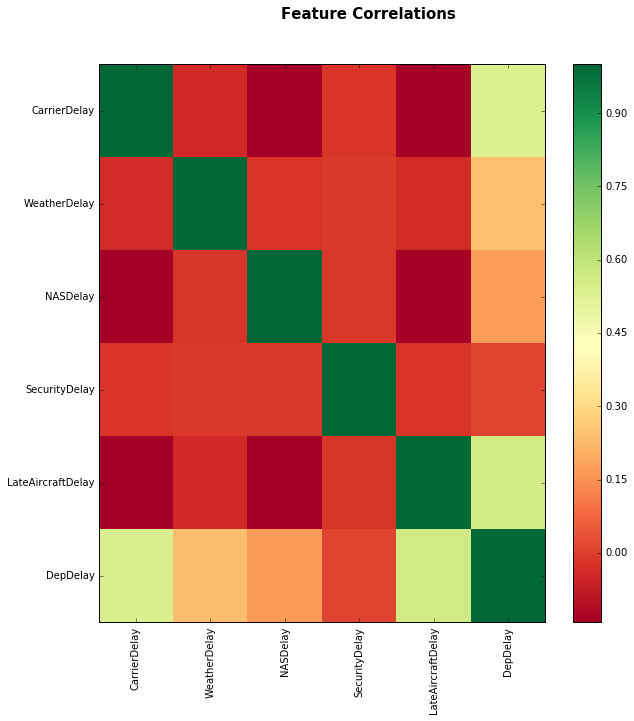

In [27]:
corr = df_corr.corr()

%pylab inline
plt.figure(figsize=(10, 10))
plt.imshow(corr, cmap='RdYlGn', interpolation='none', aspect='auto')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr)), corr.columns);
plt.suptitle('Feature Correlations', fontsize=15, fontweight='bold')
plt.show()

Если посмотреть на последнюю строку в этой матрице, можно заметить, что между вышеупомянутыми признаками и DepDelay наблюдается довольно высокая корреляция. Мы еще раз убедились, что данные признаки нужно удалить.

In [28]:
for i in list(df_new.columns[16:21]):
    del df_new[i]

Посмотрим также на корреляцию между DepDelay и остальными признаками:

Populating the interactive namespace from numpy and matplotlib


/Users/macbook/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


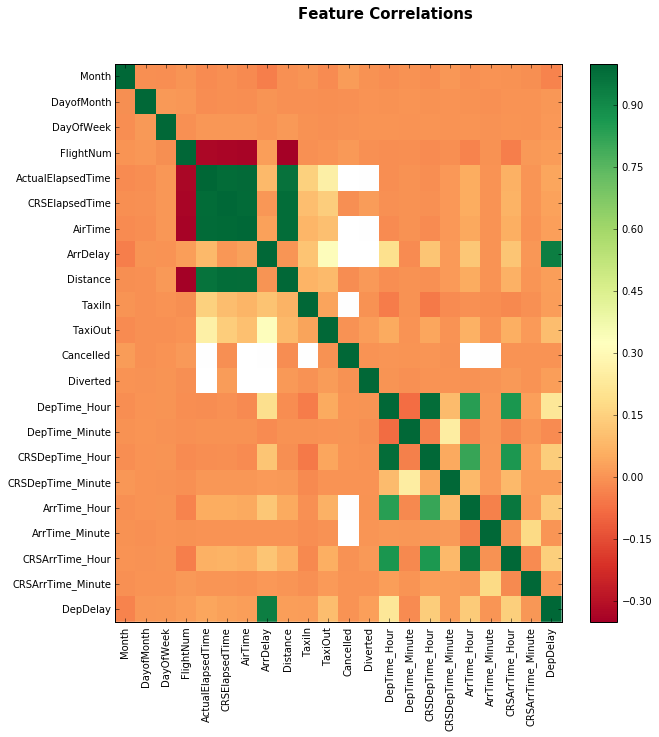

In [29]:
df_new['DepDelay'] = y
corr = df_new.corr()

#Plot Correlation Matrix using Matplotlib
%pylab inline
plt.figure(figsize=(10, 10))
plt.imshow(corr, cmap='RdYlGn', interpolation='none', aspect='auto')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr)), corr.columns);
plt.suptitle('Feature Correlations', fontsize=15, fontweight='bold')
plt.show()

Видно, что между ArrDelay и DepDelay очень высокая корреляция, и это логично, поскольку чем больше задержка при отправлении, тем больше задержка относительно запланированного времени прибытия. Поэтому удалим ArrDelay.

In [30]:
del df_new['DepDelay']
del df_new['ArrDelay']

Приведем данные к виду, пригодному для обучения линейных моделей. Для этого вещественные признаки надо отмасштабировать, а категориальные — привести к числовому виду. Также надо устранить пропуски в данных.

**9*. (1 бонусный балл) ** В первую очередь поймем, зачем необходимо применять масштабирование. Следующие ячейки с кодом построят гистограммы для 3 вещественных признаков выборки.

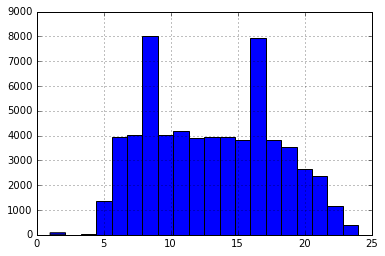

In [31]:
df_new['DepTime_Hour'].hist(bins=20)

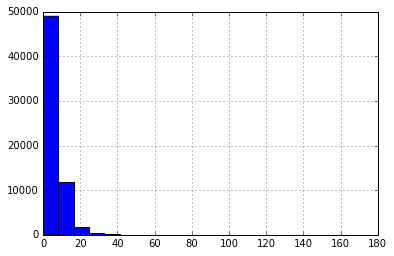

In [32]:
df_new['TaxiIn'].hist(bins=20)

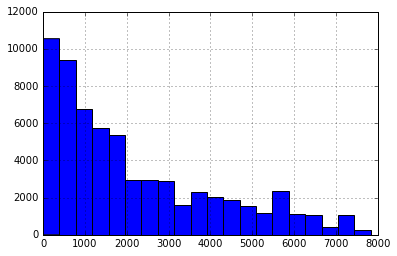

In [33]:
df_new['FlightNum'].hist(bins=20)

Какую проблему вы наблюдаете на этих графиках? Как масштабирование поможет её исправить?

Главная проблема состоит в том, что подавляющее большинство значений FlightNum больше, чем значения признаков 'DepTime_Hour' и 'TaxiIn', при этом, для нахождения весов признаков в линейной регрессии используется функционал MSE, который измеряет евклидово расстояние между $y$ и $<w,x>$. Соответственно, если значения одного признака в 1000 раз больше значений другого, то первый признак будет вносить гораздо более существенный вклад в результирующее расстояние, а другой признак в этом смысле будет практически незначимым, и, следовательно, при минимизации функционала веса (оценки коэффициентов) будут подобраны с учетом этих различий в относительном вкладе признака в величину расстояния. Хотя на самом деле вполне может получиться так, что признак с небольшими значениями имеет гораздо большую предсказательную способность, чем признак с большими значениями. Поэтому для избежания данной проблемы используется масштабирование, которое позволяет привести все признаки к одному масштабу, и, следовательно, все признаки будут вносить одинаковый (примерно) вклад в результирущее расстояние, что позволит получить более корректные оценки коэффицентов в регресии.

**10. (1 балл)** Вдобавок к масштабированию, некоторые из признаков в нашем датасете являются категориальными. Типичным подходом к работе с ними является бинарное, или [one-hot-кодирование](https://en.wikipedia.org/wiki/One-hot).


Реализуйте функцию transform_data, которая принимает на вход DataFrame с признаками и выполняет следующие шаги:
1. Замена пропущенных значений на нули для вещественных признаков и на строки 'nan' для категориальных.
2. Масштабирование вещественных признаков с помощью [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).
3. One-hot-кодирование категориальных признаков с помощью [DictVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html) или функции [pd.get_dummies](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html).

Метод должен возвращать преобразованный DataFrame, который должна состоять из масштабированных вещественных признаков и закодированных категориальных (исходные признаки должны быть исключены из выборки).

Посмотрим, какие признаки являются категориальными

In [34]:
num_cols1 = set(df_new._get_numeric_data().columns)
num_cols = set(df_new.columns)
categorial = list(num_cols-num_cols1)
numerical = list(num_cols1)
print(categorial)
print(numerical)

['UniqueCarrier', 'Dest', 'Origin']
['AirTime', 'FlightNum', 'Month', 'CRSElapsedTime', 'DayOfWeek', 'TaxiOut', 'TaxiIn', 'Diverted', 'DepTime_Minute', 'ArrTime_Hour', 'ArrTime_Minute', 'DayofMonth', 'Distance', 'CRSArrTime_Minute', 'CRSArrTime_Hour', 'ActualElapsedTime', 'Cancelled', 'CRSDepTime_Hour', 'CRSDepTime_Minute', 'DepTime_Hour']


Конечно, такие признаки, как DayofMonth, DayOfWeek и Month, тоже можно отнести к категориальным, однако в таком случае значительно увеличится общее количество признаков, что негативно скажется на качестве модели. Поэтому делать мы этого не будем и оставим данные признаки в числе вещественных.

Посмотрим, сколько уникальных значений принимает каждый из выделенных нами категориальных признаков.

In [35]:
for i in categorial:
  print(i+': '+str(df_new[i].value_counts().shape[0]))

UniqueCarrier: 20
Dest: 298
Origin: 296


Очевидно, что от признаков Origin и Dest нужно избавляться, тк в противном случае модель будет неадекватной (огромное количество признаков)

Для удобства избавимся от этих признаков после применения к датафрейму функции transfrom_data

Реализуем функцию transfrom_data

In [36]:
from sklearn.preprocessing import StandardScaler
def transform_data(data):
  num_cols1 = set(data._get_numeric_data().columns)
  num_cols = set(data.columns)
  categorial = list(num_cols-num_cols1)
  numerical = list(num_cols1)
  for i in numerical:
    data[i]=data[i].apply(lambda x: x if pd.isnull(x)==False else 0)
  for i in categorial:
    data[i]=data[i].apply(lambda x: x if pd.isnull(x)==False else 'nan')
  scaler = StandardScaler()
  data_num = scaler.fit_transform(data[list(data._get_numeric_data().columns)])
  data_final = pd.DataFrame(data_num, index=data[list(data._get_numeric_data().columns)].index, columns=list(data._get_numeric_data().columns))
  
  dummies = pd.get_dummies(data[list(set(data.columns)-set(data._get_numeric_data().columns))])
  for i in list(dummies.columns):
        data_final[i]=dummies[i]
  return data_final

Примените функцию transform_data к данным. Сколько признаков получилось после преобразования?

In [37]:
df_new1 = transform_data(df_new)
x = list(df_new1.columns)
for i in x[len(x)-296-298-20:len(x)-298-20]:
  del df_new1[i]
for i in x[len(x)-298:]:
  del df_new1[i]
df_new1.shape

/Users/macbook/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/macbook/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


(63404, 40)

В итоге получилось 40 признаков

Проверим, совпадает ли количество строк?

In [38]:
df_new.shape

(63404, 23)

**11. (0.75 балла)** Разбейте выборку и вектор целевой переменной на обучение и контроль в отношении 70/30 (для этого можно использовать, например, функцию [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html)). 

In [39]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_new1, y, test_size=0.3, random_state=89)

/Users/macbook/anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Scikit-learn

<img src = "https://pp.vk.me/c4534/u35727827/93547647/x_d31c4463.jpg">
Теперь, когда мы привели данные к пригодному виду, попробуем решить задачу при помощи метода наименьших квадратов. Напомним, что данный метод заключается в оптимизации функционала $MSE$:

$$MSE(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 \to \min_{w},$$

где $\{ (x_i, y_i ) \}_{i=1}^l$ — обучающая выборка, состоящая из $l$ пар объект-ответ.

Заметим, что решение данной задачи уже реализовано в модуле sklearn в виде класса [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression).

**12. (0.5 балла)** Обучите линейную регрессию на 1000 объектах из обучающей выборки и выведите значения $MSE$ и $R^2$ на этой подвыборке и контрольной выборке (итого 4 различных числа). Проинтерпретируйте полученный результат — насколько качественные прогнозы строит полученная модель? Какие проблемы наблюдаются в модели?

**Подсказка**: изучите значения полученных коэффициентов $w$, сохраненных в атрибуте coef_ объекта LinearRegression.

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
regression = LinearRegression()
regression.fit(X_train.iloc[:1000], y_train.iloc[:1000])
prediction_train = regression.predict(X_train.iloc[:1000])
prediction_test = regression.predict(X_test)
print('R2_train_1000 ='+str(r2_score(y_train.iloc[:1000], prediction_train)))
print('MSE_train_1000 ='+str(mean_squared_error(y_train.iloc[:1000], prediction_train)))
print('R2_test ='+str(r2_score(y_test, prediction_test)))
print('MSE_test ='+str(mean_squared_error(y_test, prediction_test)))
print(regression.coef_)

R2_train_1000 =0.0888907073432
MSE_train_1000 =1262.22072466
R2_test =0.0517272088521
MSE_test =1226.09520843
[ -5.83456573e-01   3.21126143e-01   4.20332879e-01  -8.83203062e-02
  -3.49818563e+01  -6.52256055e-01   3.36953743e+01   2.76492612e+00
   6.95745628e+00   7.83632555e+00  -6.75015599e-13   1.09754292e+00
   2.11425651e+01  -1.38494807e+00  -1.58416384e+01   1.92885708e+00
  -1.02143890e+00   3.85357324e-01   4.68594275e-01   1.97481439e+00
  -1.06581410e-14   7.10542736e-15  -8.41752545e+00  -1.45378601e+01
  -3.55271368e-15   2.14586820e+01  -1.77635684e-15   1.71645374e+01
  -9.16933421e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   1.44971580e+01  -4.87676854e+00  -5.57831252e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]


Модель переобучилась, тк $R^2$ для тренировочной и тестовой выборки довольно значительно различаются, хотя полученные коэффициенты не настолько большие (а если быть точным, совсем небольшие:)), чтобы можно было говорить о сильном переобучении (видимо, сказался тот факт, что мы не стали включать признаки Origin и Dest)

Для решения описанных вами в предыдущем пункте проблем используем L1- или L2-регуляризацию, тем самым получив Lasso и Ridge регрессии соответственно и изменив оптимизационную задачу одним из следующих образов:
$$MSE_{L1}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_1 \to \min_{w},$$
$$MSE_{L2}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_2^2 \to \min_{w},$$

где $\alpha$ — коэффициент регуляризации. Один из способов его подбора заключается в переборе некоторого количества значений и оценке качества на кросс-валидации для каждого из них, после чего выбирается значение, для которого было получено наилучшее качество.

**13. (1 балл)** Обучите линейные регрессии с L1- и L2-регуляризатором, подобрав лучшее значение параметра регуляризации из списка alpha_grid при помощи кросс-валидации c 5 фолдами на тех же 1000 объектах, что и в п.12. Выведите значения $MSE$ и $R^2$ на обучающей и контрольной выборках. Удалось ли решить указанные вами ранее проблемы?

Для выполнения данного задания вам могут понадобиться реализованные в библиотеке объекты [LassoCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html), [RidgeCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) и [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html).


In [41]:
from sklearn.cross_validation import KFold
kf = KFold(n=1000, n_folds=5, random_state=100, shuffle=False)

Lasso-регрессия

Выбор оптимального $\alpha$ проводится на основе метрики $R^2$

In [42]:
from sklearn.linear_model import LassoCV
alpha_grid = np.linspace(0.01,10, num=500)
X_train1 = X_train.iloc[:1000]
y_train1 = y_train.iloc[:1000]
new_index = [i for i in range(1000)]
X_train1.reindex(new_index)
y_train1.reindex(new_index)

optim_search=[]
for i in alpha_grid:
 lasso = LassoCV(alphas=[i])
 optim_search.append(np.mean([lasso.fit(X_train1.iloc[train_indices], 
                                        y_train1.iloc[train_indices]).score(X_train1.iloc[test_indices],y_train1.iloc[test_indices]) 
                                        for train_indices, test_indices in kf]))
maximum_r2 = np.max(optim_search)
optimal_alpha = alpha_grid[optim_search.index(maximum_r2)]

lasso = LassoCV(alphas=[optimal_alpha])
[lasso.fit(X_train1.iloc[train_indices], y_train1.iloc[train_indices]) for train_indices, test_indices in kf]
                
prediction_train = lasso.predict(X_train.iloc[:1000])
prediction_test = lasso.predict(X_test)
print('Optimal alpha = '+str(optimal_alpha))
print('R2_train_1000 ='+str(r2_score(y_train.iloc[:1000], prediction_train)))
print('MSE_train_1000 ='+str(mean_squared_error(y_train.iloc[:1000], prediction_train)))
print('R2_test ='+str(r2_score(y_test, prediction_test)))
print('MSE_test ='+str(mean_squared_error(y_test, prediction_test)))

/Users/macbook/anaconda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:479: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/macbook/anaconda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:479: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/macbook/anaconda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:479: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/macbook/anaconda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:479: ConvergenceWarning: Objective did no

Optimal alpha = 1.35134268537
R2_train_1000 =0.0502723814197
MSE_train_1000 =1315.72127803
R2_test =0.0358126062509
MSE_test =1246.67242858


/Users/macbook/anaconda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:479: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Результаты регрессии Lasso оказались хуже, чем в случае обычной регрессии. Видимо, в данном случае обычной регрессии не присуща проблема переобучения.

Ridge-регрессия.

Выбор оптимального $\alpha$ проводится на основе метрики $R^2$

In [43]:
from sklearn.linear_model import RidgeCV
alpha_grid = np.linspace(0.01,10, num=1000)
optim_search=[]
for i in alpha_grid:
 ridge = RidgeCV(alphas=[i])
 optim_search.append(np.mean([ridge.fit(X_train1.iloc[train_indices], 
                                        y_train1.iloc[train_indices]).score(X_train1.iloc[test_indices],y_train1.iloc[test_indices]) 
                                        for train_indices, test_indices in kf]))
maximum_r2 = np.max(optim_search)
optimal_alpha = alpha_grid[optim_search.index(maximum_r2)]

ridge = RidgeCV(alphas=[optimal_alpha])
[ridge.fit(X_train1.iloc[train_indices], y_train1.iloc[train_indices]) for train_indices, test_indices in kf]
                
prediction_train = ridge.predict(X_train.iloc[:1000])
prediction_test = ridge.predict(X_test)
print('Optimal alpha = '+str(optimal_alpha))
print('R2_train_1000 ='+str(r2_score(y_train.iloc[:1000], prediction_train)))
print('MSE_train_1000 ='+str(mean_squared_error(y_train.iloc[:1000], prediction_train)))
print('R2_test ='+str(r2_score(y_test, prediction_test)))
print('MSE_test ='+str(mean_squared_error(y_test, prediction_test)))

Optimal alpha = 10.0
R2_train_1000 =0.0768961663149
MSE_train_1000 =1278.83756568
R2_test =0.0373907698421
MSE_test =1244.63189886


Итоговые результаты оказались хуже, чем в обычной линейной регрессии (проводились попытки расширить диапазон значений $\alpha$, но значения итоговых метрик остались примерно такими же)

### Градиентный спуск

В предыдущем разделе мы использовали существующие реализации методов обучения линейной регрессии с регуляризацией и без. Тем не менее, подобные реализации, как правило, имеются лишь для ограниченного набора стандартных методов. В частности, при выходе функционала качества за пределы стандартного множества необходимо самостоятельно реализовывать составляющие процесса решения оптимизационной задачи. Именно этому и посвящен данный раздел задания.

Пусть необходимо минимизировать следующий функционал (Mean Square Percentage Error — модифицированный [RMSPE](https://www.kaggle.com/c/rossmann-store-sales/details/evaluation)):
$$MSPE(\{x_i, y_i\}_{i=1}^l, \, w) = \frac{1}{l}\sum_{i=1}^l \left( \frac{y_i - \langle w, x_i \rangle }{y_i} \right)^2,$$

где $\{x_i, y_i\}_{i=1}^l$ — обучающая выборка, $w$ — вектор весов линейной модели. Будем также рассматривать функционал $MSPE$ с L2-регуляризацией:

$$MSPE(\{x_i, y_i\}_{i=1}^l, \, w) = \frac{1}{l}\sum_{i=1}^l \left( \frac{y_i - \langle w, x_i \rangle }{y_i} \right)^2 + ||w||_2^2.$$

**14. (0 баллов)** Добавьте к объектам обеих выборок из п. 11 единичный признак.

In [44]:
for data in [X_train, X_test]:
    data['unit']=pd.Series(np.ones(data.shape[0]), index = data.index)

/Users/macbook/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


**15. (1 балл)** Реализуйте функции, которые вычисляют:
 * прогнозы линейной модели;
 * функционал $MSPE$ и его градиент;
 * регуляризованный $MSPE$ и его градиент.

In [45]:
# возвращает вектор прогнозов линейной модели с вектором весов w для выборки X
def make_pred(X, w):
    return np.dot(X,w)

Сделаем проверку:

In [46]:
w = np.array([i for i in range(X_train.shape[1])])
make_pred(X_train, w)

array([ 142.22613565,    7.0577932 ,  121.35463729, ...,  -49.89855993,
        100.50840353,   30.82180922])

In [47]:
X = np.arange(1,5).reshape(2,2)
w = np.array([1,2])
print(X)
print(w)
print(make_pred(X,w))

[[1 2]
 [3 4]]
[1 2]
[ 5 11]


In [48]:
# возвращает значение функционала MSPE для выборки (X, y) и вектора весов w
def get_func(w, X, y):
    index = np.array([i for i in range(X.shape[0])])
    X = X.set_index(index)
    y = np.array(pd.DataFrame(y).set_index(index))
    mspe=0
    for i in range(len(y)):
        mspe+=((y[i]-make_pred(X.iloc[i],w))/y[i])**2
    return (mspe/X.shape[0])[0]

Сделаем проверку:

In [49]:
w = np.array([i for i in range(X_train.shape[1])])
get_func(w, X_train, y_train)

1081.3417577341866

In [50]:
# возвращает градиент функционала MSPE для выборки (X, y) и вектора весов w
def get_grad(w, X, y):
    index = np.array([i for i in range(X.shape[0])])
    X = X.set_index(index)
    y = np.array(pd.DataFrame(y).set_index(index))
    gradient = []
    for i in range(len(w)):
        dw_i = 0
        for j in range(X.shape[0]):
            dw_i+=-2*((y[j]-make_pred(X.iloc[j],w))/y[j])*X.iloc[j][i]/(y[j]*X.shape[0])
        gradient.append(dw_i[0])
    return np.array(gradient)

Сделаем проверку:

In [51]:
w = np.array([i for i in range(X_train.iloc[:10].shape[1])])
get_grad(w, X_train.iloc[:10], y_train.iloc[:10])

array([-32.95187264, -14.90065051,  -1.33304762, -10.02043288,
         5.30898971,   6.782362  ,   7.41391437,   7.27470751,
        -3.65252341,  -9.80900465,  -0.35174252,  -1.25324545,
        16.47871228,   3.84056056,  17.37347706,  10.68983116,
        17.71962494,  17.97862859,  18.50041601,  18.31078342,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,  25.56533421])

In [52]:
# возвращает значение регуляризованного функционала MSPE для выборки (X, y) и вектора весов w
def get_reg_func(w, X, y):
    index = np.array([i for i in range(X.shape[0])])
    X = X.set_index(index)
    y = np.array(pd.DataFrame(y).set_index(index))
    mspe=0
    for i in range(len(y)):
        mspe+=((y[i]-make_pred(X.iloc[i],w))/y[i])**2
    mspe=(mspe/X.shape[0])[0]
    mspe+=np.dot(w,w)
    return mspe

Сделаем проверку:

In [53]:
# возвращает градиент регуляризованного функционала MSPE для выборки (X, y) и вектора весов w
def get_reg_grad(w, X, y):
    index = np.array([i for i in range(X.shape[0])])
    X = X.set_index(index)
    y = np.array(pd.DataFrame(y).set_index(index))
    gradient = []
    for i in range(len(w)):
        dw_i = 0
        for j in range(X.shape[0]):
            dw_i+=-2*((y[j]-make_pred(X.iloc[j],w))/y[j])*X.iloc[j][i]/(y[j]*X.shape[0])
        dw_i = dw_i+2*w[i]
        gradient.append(dw_i[0])
    return np.array(gradient)

Сделаем проверку:

In [54]:
w = np.array([i for i in range(X_train.iloc[:10].shape[1])])
get_reg_grad(w, X_train.iloc[:10], y_train.iloc[:10])

array([ -32.95187264,  -12.90065051,    2.66695238,   -4.02043288,
         13.30898971,   16.782362  ,   19.41391437,   21.27470751,
         12.34747659,    8.19099535,   19.64825748,   20.74675455,
         40.47871228,   29.84056056,   45.37347706,   40.68983116,
         49.71962494,   51.97862859,   54.50041601,   56.31078342,
         40.        ,   42.        ,   44.        ,   46.        ,
         48.        ,   50.        ,   52.        ,   54.        ,
         56.        ,   58.        ,   60.        ,   62.        ,
         64.        ,   66.        ,   68.        ,   70.        ,
         72.        ,   74.        ,   76.        ,   78.        ,
        105.56533421])

**16. (1 балл)** Реализуйте метод градиентного спуска для описанных функционалов ($MSPE$ и его регуляризованный вариант). Функция должна принимать следующие параметры:
 - X — матрица "объект-признак";
 - y — вектор целевой переменной;
 - w0 — начальное значение вектора весов;
 - step_size — значение темпа обучения;
 - max_iter — максимальное число итераций;
 - eps — значение, используемое в критерии останова;
 - is_reg — бинарный параметр, принимает значение True в случае наличия регуляризации функционала, False — в противном случае.
 
Процесс должен быть остановлен, если выполнено хотя бы одно из следующих условий:
 - было выполнено заданное количество итераций max_iter;
 - евклидова норма разности векторов $w$ на соседних итерациях стала меньше, чем eps.

Функция должна возвращать полученный в результате оптимизации вектор $w$ и список значений функционала на каждой итерации.

In [55]:
def grad_descent(X, y, w_0, step_size, max_iter, eps, is_reg):
    w=w_0
    values=[]
    if is_reg==False:
     for i in range(max_iter):
           w_old=w
           w=w-step_size*get_grad(w, X, y)
           values.append(get_func(w, X, y))
           if np.sqrt(np.dot(w-w_old, w-w_old))<=eps:
                return {'w':w, 'значения функционала':values}
     return {'w':w, 'значения функционала':values}
    else:
     for i in range(max_iter):
           w_old=w
           w=w-step_size*get_reg_grad(w, X, y)
           values.append(get_reg_func(w, X, y))
           if np.sqrt(np.dot(w-w_old, w-w_old))<=eps:
                return {'w':w, 'значения функционала':values}
     return {'w':w, 'значения функционала':values}

Обучите линейную регрессию с функционалом $MSPE$ на обучающей выборке при помощи метода градиентного спуска и изобразите кривые зависимости значения функционала от номера итерации для различных:
 * значений размера шага из набора [0.001, 1, 10];
 * способов начальной инициализации вектора весов (нули, случайные веса).

Проанализируйте полученные результаты — влияют ли данные параметры на скорость сходимости и итоговое качество? Если да, то как?

Посмотрим сначала, как ведет себя алгоритм при различных размерах шага на малой выборке (а именно: нас интересует сходимость алгоритма, т.е. динамика евклидовой нормы разности соседних векторов). В целях простоты пока не будем использовать функцию grad_descent.

step_size=0.001. Нулевой вектор используется в качестве стартового вектора весов.

Евклидова норма = 0.000556748519173; значение функционала = 0.999690527835
Евклидова норма = 0.000554964175906; значение функционала = 0.999383036036
Евклидова норма = 0.000553186026039; значение функционала = 0.999077511406
Евклидова норма = 0.000551414046755; значение функционала = 0.99877394084
Евклидова норма = 0.000549648215321; значение функционала = 0.998472311321
Евклидова норма = 0.000547888509091; значение функционала = 0.998172609925
Евклидова норма = 0.000546134905508; значение функционала = 0.997874823813
Евклидова норма = 0.000544387382098; значение функционала = 0.997578940239
Евклидова норма = 0.000542645916475; значение функционала = 0.997284946542
Евклидова норма = 0.000540910486337; значение функционала = 0.996992830149
Евклидова норма = 0.000539181069468; значение функционала = 0.996702578574
Евклидова норма = 0.000537457643735; значение функционала = 0.996414179416
Евклидова норма = 0.000535740187093; значение функционала = 0.996127620361
Евклидова норма = 0.000534

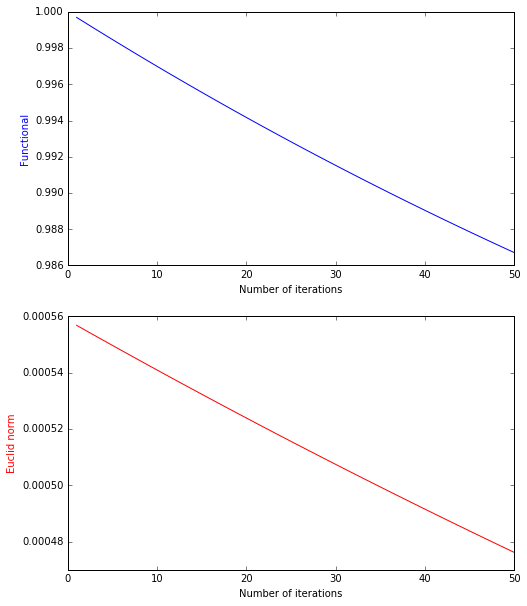

In [67]:
import matplotlib.pyplot as plt
%matplotlib inline
w_0 = np.zeros(X_train.iloc[:80].shape[1])
w=w_0
values=[]
norm = []
for i in range(50):
   w_old=w
   w=w-0.001*get_reg_grad(w, X_train.iloc[:80], y.iloc[:80])
   get_reg_func(w, X_train.iloc[:80], y.iloc[:80])
   values.append(get_reg_func(w, X_train.iloc[:80], y.iloc[:80]))
   norm.append(np.sqrt(np.dot(np.transpose(w-w_old), w-w_old)))
   print('Евклидова норма = '+str(np.sqrt(np.dot(np.transpose(w-w_old), w-w_old)))+'; значение функционала = '+
         str(get_reg_func(w, X_train.iloc[:80], y.iloc[:80])))

fig = plt.figure(figsize=(8,10))
ax1 = fig.add_subplot(2, 1, 1)
ax1.plot([i for i in range(1,51)], values, 'b-')
ax1.set_ylabel('Functional', color='blue')
ax1.set_xlabel('Number of iterations')

ax2 = fig.add_subplot(2, 1, 2)
ax2.plot([i for i in range(1,51)], norm, 'r-')
ax2.set_ylabel('Euclid norm', color='red')
ax2.set_xlabel('Number of iterations')

Видно, что для step_size=0.001 алгоритм постпенно сходится (но медленно;мы еще раз проверим сходимость уже на полной обучающей выборке с помощью функции grad_descent). Исходя из полученного результата в дальнейшем будем использовать eps = 0.00048

Проделаем те же самые операции для step_size=1

Евклидова норма = 0.556748519173; значение функционала = 1.18677946179
Евклидова норма = 1.28039601168; значение функционала = 2.46087230404
Евклидова норма = 3.34390489896; значение функционала = 12.2586691191
Евклидова норма = 9.29944513938; значение функционала = 92.2465262311
Евклидова норма = 26.632728823; значение функционала = 765.397621674
Евклидова норма = 77.3757125964; значение функционала = 6522.10259227
Евклидова норма = 226.474268354; значение функционала = 56185.9020303
Евклидова норма = 665.540612072; значение функционала = 486736.404544
Евклидова норма = 1960.17511813; значение функционала = 4229581.11174
Евклидова норма = 5780.39281226; значение функционала = 36817524.3617
Евклидова норма = 17057.963487; значение функционала = 320804476.966
Евклидова норма = 50358.4279613; значение функционала = 2796862426.21
Евклидова норма = 148702.174614; значение функционала = 24391699381.1
Евклидова норма = 439157.096851; значение функционала = 212761741096.0
Евклидова норма = 12

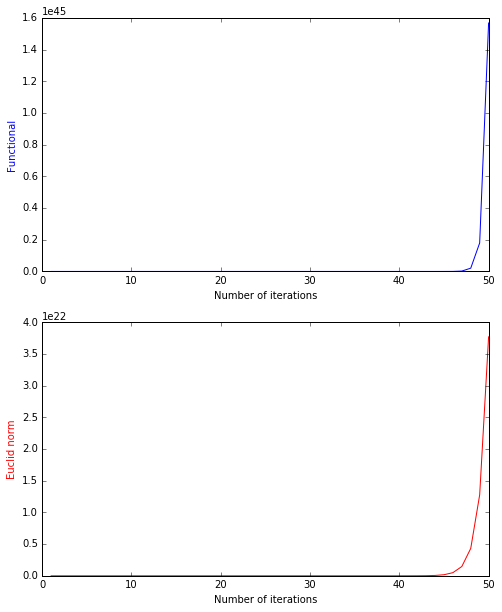

In [68]:
w_0 = np.zeros(X_train.iloc[:80].shape[1])
w=w_0
values=[]
norm = []
for i in range(50):
   w_old=w
   w=w-1*get_reg_grad(w, X_train.iloc[:80], y.iloc[:80])
   get_reg_func(w, X_train.iloc[:80], y.iloc[:80])
   values.append(get_reg_func(w, X_train.iloc[:80], y.iloc[:80]))
   norm.append(np.sqrt(np.dot(np.transpose(w-w_old), w-w_old)))
   print('Евклидова норма = '+str(np.sqrt(np.dot(np.transpose(w-w_old), w-w_old)))+'; значение функционала = '+
         str(get_reg_func(w, X_train.iloc[:80], y.iloc[:80])))

fig = plt.figure(figsize=(8,10))
ax1 = fig.add_subplot(2, 1, 1)
ax1.plot([i for i in range(1,51)], values, 'b-')
ax1.set_ylabel('Functional', color='blue')
ax1.set_xlabel('Number of iterations')

ax2 = fig.add_subplot(2, 1, 2)
ax2.plot([i for i in range(1,51)], norm, 'r-')
ax2.set_ylabel('Euclid norm', color='red')
ax2.set_xlabel('Number of iterations')

Очевидно, что сходимости в данном случае не наблюдается, скорее всего, проблема в самом шаге, а не в изначальном векторе весов (мы проверим это позже).

Проделаем те же самые операции для step_size=10

Евклидова норма = 5.56748519173; значение функционала = 47.5751484027
Евклидова норма = 176.658961665; значение функционала = 50991.9420603
Евклидова норма = 6034.99363746; значение функционала = 62925521.9225
Евклидова норма = 216404.86208; значение функционала = 83685492765.4
Евклидова норма = 7987960.63219; значение функционала = 1.1628056418e+14
Евклидова норма = 299865337.821; значение функционала = 1.65758780785e+17
Евклидова норма = 11369088228.4; значение функционала = 2.39919976628e+20
Евклидова норма = 433634565707.0; значение функционала = 3.5051190491e+23
Евклидова норма = 1.66007960407e+13; значение функционала = 5.15073200081e+26
Евклидова норма = 6.37011889561e+14; значение функционала = 7.597039863e+29
Евклидова норма = 2.44802112257e+16; значение функционала = 1.12319813506e+33
Евклидова норма = 9.41678633374e+17; значение функционала = 1.66318972305e+36
Евклидова норма = 3.62463254891e+19; значение функционала = 2.4652867267e+39
Евклидова норма = 1.39574018296e+21; зн

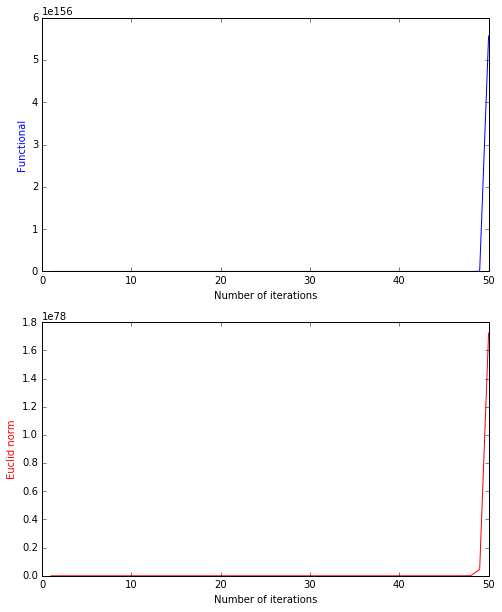

In [69]:
w_0 = np.zeros(X_train.iloc[:80].shape[1])
w=w_0
values=[]
norm = []
for i in range(50):
   w_old=w
   w=w-10*get_reg_grad(w, X_train.iloc[:80], y.iloc[:80])
   get_reg_func(w, X_train.iloc[:80], y.iloc[:80])
   values.append(get_reg_func(w, X_train.iloc[:80], y.iloc[:80]))
   norm.append(np.sqrt(np.dot(np.transpose(w-w_old), w-w_old)))
   print('Евклидова норма = '+str(np.sqrt(np.dot(np.transpose(w-w_old), w-w_old)))+'; значение функционала = '+
         str(get_reg_func(w, X_train.iloc[:80], y.iloc[:80])))

fig = plt.figure(figsize=(8,10))
ax1 = fig.add_subplot(2, 1, 1)
ax1.plot([i for i in range(1,51)], values, 'b-')
ax1.set_ylabel('Functional', color='blue')
ax1.set_xlabel('Number of iterations')

ax2 = fig.add_subplot(2, 1, 2)
ax2.plot([i for i in range(1,51)], norm, 'r-')
ax2.set_ylabel('Euclid norm', color='red')
ax2.set_xlabel('Number of iterations')

Аналогичная проблема: алгоритм расходится.

Перейдем теперь к обучению алгоритмов на более большой выборке. К сожалению, опытным путем было установлено, что вычислительные мощности моего компьюьтера не справляются со всей выборкой, поэтому пришлось урезать ее до 1000. При этом, для удобства установим верхнюю границу в размере 50000 на евклидову норму разности между соседними векторами, чтобы сэкономить время:) (при таком значений нормы алгоритм с очень большой вероятностью разойдется) если евклидова норма превысит этот предел, алгоритм будет выдавать соответствующее сообщение. Модицифицируем с учетом этого функцию grad_descent, также сделаем так, чтобы функцию выдавала график функционала в зависимости от итерации.

In [118]:
def grad_descent(X, y, w_0, step_size, max_iter, eps, is_reg):
    w=w_0
    values=[]
    if is_reg==False:
     for i in range(max_iter):
           w_old=w
           w=w-step_size*get_grad(w, X, y)
           values.append(get_func(w, X, y))
           if np.sqrt(np.dot(w-w_old, w-w_old))>=50000:
                return 'Алгоритм не сошелся'
           elif np.sqrt(np.dot(w-w_old, w-w_old))<=eps:
                fig = plt.figure(figsize=(8,10))
                ax1 = fig.add_subplot(2, 1, 1)
                ax1.plot([j for j in range(1,i+2)], values, 'b-')
                ax1.set_ylabel('Functional', color='blue')
                ax1.set_xlabel('Number of iterations')
                return {'w':w, 'значения функционала':values}
                
     fig = plt.figure(figsize=(8,10))
     ax1 = fig.add_subplot(2, 1, 1)
     ax1.plot([j for j in range(1,max_iter+1)], values, 'b-')
     ax1.set_ylabel('Functional', color='blue')
     ax1.set_xlabel('Number of iterations')    
     return {'w':w, 'значения функционала':values}
     
    else:
     for i in range(max_iter):
           w_old=w
           w=w-step_size*get_reg_grad(w, X, y)
           values.append(get_reg_func(w, X, y))
           if np.sqrt(np.dot(w-w_old, w-w_old))>=50000:
                return 'Алгоритм не сошелся'
           elif np.sqrt(np.dot(w-w_old, w-w_old))<=eps:
                fig = plt.figure(figsize=(8,10))
                ax1 = fig.add_subplot(2, 1, 1)
                ax1.plot([j for j in range(1,i+2)], values, 'b-')
                ax1.set_ylabel('Functional', color='blue')
                ax1.set_xlabel('Number of iterations')
                return {'w':w, 'значения функционала':values}
     
     fig = plt.figure(figsize=(8,10))
     ax1 = fig.add_subplot(2, 1, 1)
     ax1.plot([j for j in range(1,max_iter+1)], values, 'b-')
     ax1.set_ylabel('Functional', color='blue')
     ax1.set_xlabel('Number of iterations')
     return {'w':w, 'значения функционала':values}

Перейдем теперь к обучению алгоритма на X_train[:1000] и y_train[:1000]. Максимальное количестов итераций=50, eps = 0.00048, верхняя граница на норму = 50000

step_size=0.001, стартовый вектор весов - нулевой

{'w': array([ -4.78954257e-04,  -9.99296040e-04,   1.84457463e-03,
         -7.71077223e-04,   1.65636212e-03,   1.79619653e-03,
          1.52285288e-03,   1.58447089e-03,   2.56338028e-04,
          1.41180589e-03,   1.41387673e-04,   3.57070639e-03,
          1.95673869e-03,  -3.10784315e-03,   1.25313466e-03,
          6.69521891e-04,   1.10992090e-03,   1.32410020e-03,
          1.06740358e-03,   3.95811805e-04,   0.00000000e+00,
          0.00000000e+00,  -4.96783674e-05,  -1.19189553e-04,
          0.00000000e+00,  -2.61016522e-04,   0.00000000e+00,
         -1.14982422e-04,  -6.16128412e-05,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          4.34895955e-06,  -2.49421922e-05,  -4.96691340e-05,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,  -1.02763326e-02]),
 'значения функционала': [0.99993597494018338,
  0.99987201239195167,
  0.99980811226286814,
  0.99974427446068448,
  0.99968049889332244,
  0.

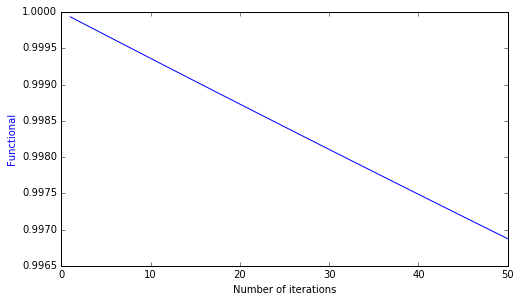

In [78]:
grad_descent(X_train.iloc[:1000], y_train.iloc[:1000], np.zeros((X_train.iloc[:1000].shape[1])), 0.001, 50, 0.0000048, False)

Конечно, алгоритм сошелся не полностью, но проблема здесь, видимо, в слишком малом шаге

Теперь попробуем сделать то же самое со случайными весами, при этом, немного увеличим eps для экономии ресурсов:)

{'w': array([-0.02192239, -0.00692579, -0.00034607,  0.01116688, -0.0028733 ,
        -0.00910052, -0.00778374,  0.01226179, -0.00769234, -0.0035813 ,
         0.01513991, -0.00532915,  0.001997  , -0.01936925,  0.00225708,
        -0.00416885, -0.00360747,  0.00856428,  0.00850695,  0.00198152,
        -0.0170494 ,  0.02055824,  0.01207889,  0.01056148,  0.0005143 ,
        -0.00828938,  0.00053035, -0.02333785,  0.00571159,  0.00373591,
         0.00860108, -0.00078241, -0.00812659,  0.01859567, -0.00781815,
        -0.00335143,  0.00170428,  0.01701713, -0.00145426,  0.02384818,
        -0.00049972]),
 'значения функционала': [1.0022323324307474,
  1.0021655164041785,
  1.0020987687844372,
  1.0020320894639601,
  1.0019654783354035,
  1.0018989352916565,
  1.001832460225814,
  1.0017660530312111,
  1.0016997136013861,
  1.0016334418301041,
  1.0015672376113582,
  1.0015011008393495,
  1.0014350314085068,
  1.001369029213468,
  1.0013030941490972,
  1.0012372261104721,
  1.0011714249

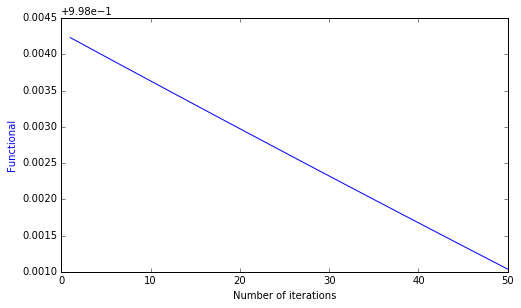

In [80]:
array = numpy.random.uniform(-1/X_train.iloc[:1000].shape[1], 1/X_train.iloc[:1000].shape[1], size=X_train.iloc[:1000].shape[1])
grad_descent(X_train.iloc[:1000], y_train.iloc[:1000], array, 0.001, 50, 0.000058, False)

Коэффициенты получились больше (по модулю), чем в предыдущем случае, при этом, сходимость очень медленная

Обучение алгоритма со step_size=1 с нулевыми весами:

{'w': array([-0.00450147, -0.03550848,  0.19791798, -0.09844568,  0.08820075,
        -0.03371557,  0.10638596, -0.04022536, -0.22449892,  0.00335705,
         0.01013245,  0.11946238,  0.14686305, -0.21369419, -0.15054741,
         0.19382454,  0.14656283,  0.02988694, -0.10827382, -0.03551569,
         0.        ,  0.        , -0.03096746, -0.03034159,  0.        ,
        -0.13945663,  0.        , -0.07069807, -0.04753606,  0.        ,
         0.        ,  0.        ,  0.        ,  0.00450562, -0.02040012,
        -0.0238932 ,  0.        ,  0.        ,  0.        ,  0.        ,
        -0.73644603]),
 'значения функционала': [0.95159876557789336,
  0.93088944057973033,
  0.92014468732741694,
  0.91414529857165994,
  0.91058420618787728,
  0.90835971986018482,
  0.90691055023025247,
  0.90593326388936113,
  0.90525472592883216,
  0.90477132698412721,
  0.90441851579802079,
  0.90415474112286043,
  0.90395256291083981,
  0.90379349863555658,
  0.90366490838839153,
  0.903558044504735

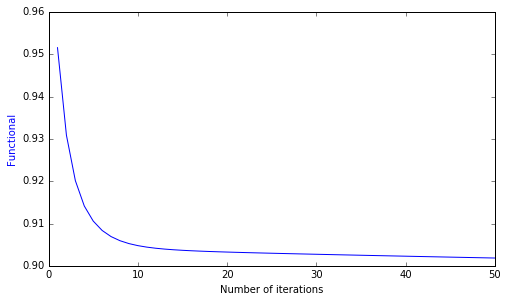

In [81]:
grad_descent(X_train.iloc[:1000], y_train.iloc[:1000], np.zeros((X_train.iloc[:1000].shape[1])), 1, 50, 0.000058, False)

График позволяет утверждать, что при step_size=1 алгоритм сошелся! Кроме того, веса получились более менее значимыми по модулю. 

С учетом того, что алгоритм сошелся, а также в целях экономии времени перейдем сразу к step_size=10. В этот раз зададим случайные веса.

In [82]:
array = numpy.random.uniform(-1/X_train.iloc[:1000].shape[1], 1/X_train.iloc[:1000].shape[1], size=X_train.iloc[:1000].shape[1])
grad_descent(X_train.iloc[:1000], y_train.iloc[:1000], array, 10, 50, 0.000058, False)

'Алгоритм не сошелся'

В таком случае попробуем нулевые веса, хотя это вряд ли что-то изменит, тк, по-видимому, step_size слишком большой.

In [83]:
grad_descent(X_train.iloc[:1000], y_train.iloc[:1000], np.zeros((X_train.iloc[:1000].shape[1])), 10, 50, 0.000058, False)

'Алгоритм не сошелся'

Итог: step_size=10 - слишком большой темп обучения.

**17. (0.5 балла)** Обучите линейную регрессию с функционалом MSPE и его регуляризованным вариантом на обучающей выборке при помощи метода градиентного спуска и изобразите кривые зависимости значения функционала от номера итерации. Исследуйте зависимость скорости сходимости от наличия регуляризации. Обоснуйте, почему так происходит.

С учетом полученных результатов будем использовать stepsize=1.

In [93]:
grad_descent(X_train.iloc[:1000], y_train.iloc[:1000], np.zeros((X_train.iloc[:1000].shape[1])), 1, 50, 0.000058, True)

'Алгоритм не сошелся'

Функционал ошибки при одинаковых w при регуляризации больше, чем в обычном случае. Возможно, поэтому алгоритм не сошелся. Попробуем step_size=0.001

{'w': array([ -4.56243387e-04,  -9.52109785e-04,   1.75714933e-03,
         -7.34688367e-04,   1.57845374e-03,   1.71174952e-03,
          1.45125758e-03,   1.51004640e-03,   2.44483366e-04,
          1.34508017e-03,   1.34691857e-04,   3.40229640e-03,
          1.86446405e-03,  -2.96084245e-03,   1.19423006e-03,
          6.37544475e-04,   1.05782588e-03,   1.26158340e-03,
          1.01735191e-03,   3.77247297e-04,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         -7.38363153e-05,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          6.56951576e-07,   0.00000000e+00,   2.20770359e-06,
          0.00000000e+00,   0.00000000e+00,  -6.57916546e-05,
          9.92284036e-07,  -9.78966759e-03]),
 'значения функционала': [0.99993607693272557,
  0.99987247159848269,
  0.99980918238673477,
  0.99974620769528699,
  0.99968354593024877,
  0.

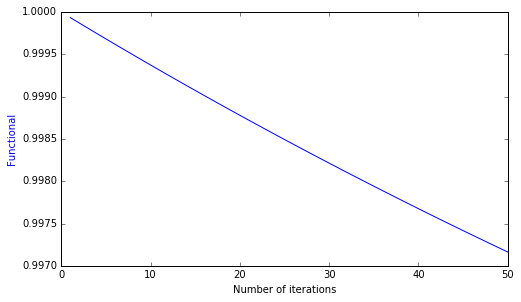

In [119]:
grad_descent(X_train.iloc[:1000], y_train.iloc[:1000], np.zeros((X_train.iloc[:1000].shape[1])), 0.001, 50, 0.000058, True)

При отсутствии регуляризации функционал быстро уменьшился с 0.95 до 0.90, но потом скорость сходимости резко замедлилась. Что же касается случая с регуляризацией, здесь нет быстрого уменьшения функциоанал и скорость сходимости примерно такая же, как и в случае отсутствия регуляризации (после резкого снижения). По идее, наличие штрафа за веса должно ускорять сходимость алгоритма. Возможно, стоило взять другой step_size для того, чтобы более наглядно представить различия в сходимости алгоритма.

Метод градиентного спуска может быть весьма трудозатратен в случае большого размера обучающей выборки. Поэтому часто используют метод стохастического градиентного спуска, где на каждой итерации выбирается случайный объект из обучающей выборки и обновление весов происходит только по этому объекту. 

**18*. (1 бонусный балл)**  Реализуйте метод стохастического градиентного спуска (SGD) для описанных функционалов ($MSPE$ и его регуляризованный вариант). Функция должна иметь параметры и возвращаемое значение, аналогичные оным функции grad\_descent из п.21. Кроме того, должен использоваться аналогичный критерий останова.

In [68]:
from sklearn.utils import shuffle
def sgd(X, y, w_0, step_size, max_iter, eps, is_reg):
    w=w_0
    values=[]
    if is_reg==False:
     for i in range(max_iter):
           X, y = shuffle(X, y, random_state=i)
           index = np.array([i for i in range(X.shape[0])])
           X = X.set_index(index)
           y = np.array(pd.DataFrame(y).set_index(index))
           X_new = X.iloc[:int(np.round(0.25*X.shape[0]))]
           y_new = y[:int(np.round(0.25*X.shape[0]))]
            
            
           w_old=w 
           w=w-step_size*get_grad(w, X_new, y_new)
           values.append(get_func(w, X_new, y_new))
           if np.sqrt(np.dot(w-w_old, w-w_old))<=eps:
                return {'w':w, 'значения функционала':values}
     return {'w':w, 'значения функционала':values}
    else:
     for i in range(max_iter):
           X, y = shuffle(X, y, random_state=i)
           index = np.array([i for i in range(X.shape[0])])
           X = X.set_index(index)
           y = np.array(pd.DataFrame(y).set_index(index))
           X_new = X.iloc[:int(np.round(0.25*X.shape[0]))]
           y_new = y[:int(np.round(0.25*X.shape[0]))]
            
           
           w_old=w
           w=w-step_size*get_reg_grad(w, X_new, y_new)
           values.append(get_reg_func(w, X_new, y_new))
           if np.sqrt(np.dot(w-w_old, w-w_old))<=eps:
                return {'w':w, 'значения функционала':values}
     return {'w':w, 'значения функционала':values}

Обучите линейную регрессию с функционалом $MSPE$ и его регуляризованным вариантом на обучающей выборке при помощи метода стохастического градиентного спуска, подобрав при этом размер шага, при котором метод будет сходиться. Нарисуйте график сходимости. Выведите значения $MSPE, MSE, R^2$ на контрольной выборке.

In [69]:
sgd(X_train.iloc[:1000], y_train.iloc[:1000], np.zeros((X_train.iloc[:1000].shape[1])), 1, 50, 0.000058, True)

{'w': array([  5.08179807e+16,   4.83512720e+16,  -2.77286127e+17,
          5.17885018e+17,  -1.52508197e+18,  -1.53112565e+18,
         -1.55388046e+18,  -1.53092536e+18,  -4.86089092e+15,
         -1.96582370e+17,   2.22756353e+15,   3.68786792e+16,
          4.37505631e+17,  -1.32057675e+15,   4.50819653e+17,
         -5.46907026e+16,   3.07315206e+17,  -4.42744989e+17,
          2.96550406e+17,   1.62739187e+17,   0.00000000e+00,
          0.00000000e+00,   1.02037668e+14,   1.50217339e+15,
          0.00000000e+00,   5.59233435e+14,   0.00000000e+00,
          6.75109500e+14,   5.88801669e+14,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.91398679e+12,   5.86852026e+12,   2.32220147e+14,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,  -1.61903673e+17]),
 'значения функционала': [1.077599239264124,
  1.4296641246292525,
  3.6878457648107235,
  5.6284684560360914,
  18.17488624327757,
  108.26038

Алгоритм "разошелся":(

Попробуем изменить алгоритм, а также модифицируем его таким образом, чтобы он строил нам график сходимости

In [74]:
def sgd(X, y, w_0, step_size, max_iter, eps, is_reg):
    w=w_0
    values=[]
    if is_reg==False:
     for i in range(max_iter):
           X, y = shuffle(X, y, random_state=i)
           index = np.array([i for i in range(X.shape[0])])
           X = X.set_index(index)
           y = np.array(pd.DataFrame(y).set_index(index))
           X_new = X.iloc[:int(np.round(0.25*X.shape[0]))]
           y_new = y[:int(np.round(0.25*X.shape[0]))]
            
            
           w_old=w 
           w=w-step_size*get_grad(w, X_new, y_new)
           values.append(get_func(w, X_new, y_new))
           if np.sqrt(np.dot(w-w_old, w-w_old))>=50000:
              return 'Алгоритм не сошелся'
           elif np.sqrt(np.dot(w-w_old, w-w_old))<=eps:
                fig = plt.figure(figsize=(8,10))
                ax1 = fig.add_subplot(2, 1, 1)
                ax1.plot([j for j in range(1,i+2)], values, 'b-')
                ax1.set_ylabel('Functional', color='blue')
                ax1.set_xlabel('Number of iterations')    
                return {'w':w, 'значения функционала':values}
     fig = plt.figure(figsize=(8,10))
     ax1 = fig.add_subplot(2, 1, 1)
     ax1.plot([j for j in range(1,max_iter+1)], values, 'b-')
     ax1.set_ylabel('Functional', color='blue')
     ax1.set_xlabel('Number of iterations')    
     return {'w':w, 'значения функционала':values}
    else:
     for i in range(max_iter):
           X, y = shuffle(X, y, random_state=i)
           index = np.array([i for i in range(X.shape[0])])
           X = X.set_index(index)
           y = np.array(pd.DataFrame(y).set_index(index))
           X_new = X.iloc[:int(np.round(0.25*X.shape[0]))]
           y_new = y[:int(np.round(0.25*X.shape[0]))]
            
            
           w_old=w 
           w=w-step_size*get_reg_grad(w, X_new, y_new)
           values.append(get_reg_func(w, X_new, y_new))
           if np.sqrt(np.dot(w-w_old, w-w_old))>=50000:
              return 'Алгоритм не сошелся'
           elif np.sqrt(np.dot(w-w_old, w-w_old))<=eps:
                fig = plt.figure(figsize=(8,10))
                ax1 = fig.add_subplot(2, 1, 1)
                ax1.plot([j for j in range(1,i+2)], values, 'b-')
                ax1.set_ylabel('Functional', color='blue')
                ax1.set_xlabel('Number of iterations')    
                return {'w':w, 'значения функционала':values}
     fig = plt.figure(figsize=(8,10))
     ax1 = fig.add_subplot(2, 1, 1)
     ax1.plot([j for j in range(1,max_iter+1)], values, 'b-')
     ax1.set_ylabel('Functional', color='blue')
     ax1.set_xlabel('Number of iterations')    
     return {'w':w, 'значения функционала':values}

{'w': array([ -4.84426740e-03,  -4.17313553e-03,   1.46512317e-02,
         -4.21391663e-03,   1.19689567e-02,   1.27567801e-02,
          1.12865587e-02,   1.11246788e-02,   1.13774016e-03,
          8.04916741e-03,   8.26231186e-04,   1.87139269e-02,
          5.77555769e-03,  -1.87809695e-02,   1.26786638e-03,
          5.82345526e-03,   2.09600166e-03,   6.68506563e-03,
          1.77850308e-03,  -7.51279130e-04,   0.00000000e+00,
          0.00000000e+00,  -2.33785036e-04,  -7.34200038e-04,
          0.00000000e+00,  -1.57397833e-03,   0.00000000e+00,
         -7.12678913e-04,  -2.88997799e-04,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          3.33072356e-05,  -1.24944794e-04,  -2.47583905e-04,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,  -6.00520984e-02]),
 'значения функционала': [0.99836838751978219,
  0.9984856873149448,
  0.99779865079692376,
  0.9966562480993455,
  0.99733039556154912,
  0.99

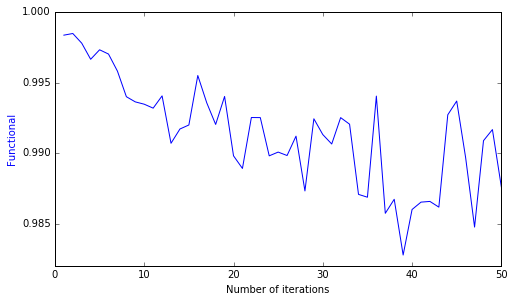

In [75]:
sgd(X_train.iloc[:1000], y_train.iloc[:1000], np.zeros((X_train.iloc[:1000].shape[1])), 0.01, 50, 0.000058, True)

Наблюдается пусть и относительно медленная, но сходимость алгоритма. Полученные веса невелики по модулю, что говорит о том, что скорее всего алгоритм не переобучился. Также стоит омтетить, что из-за фактора случайности сходимость неравномерная и непостоянная.

Посчитаем статистики $MSPE$, $MSE$ и $R^2$ на контрольной выборке

In [76]:
w=array([ -4.84426740e-03,  -4.17313553e-03,   1.46512317e-02,
         -4.21391663e-03,   1.19689567e-02,   1.27567801e-02,
          1.12865587e-02,   1.11246788e-02,   1.13774016e-03,
          8.04916741e-03,   8.26231186e-04,   1.87139269e-02,
          5.77555769e-03,  -1.87809695e-02,   1.26786638e-03,
          5.82345526e-03,   2.09600166e-03,   6.68506563e-03,
          1.77850308e-03,  -7.51279130e-04,   0.00000000e+00,
          0.00000000e+00,  -2.33785036e-04,  -7.34200038e-04,
          0.00000000e+00,  -1.57397833e-03,   0.00000000e+00,
         -7.12678913e-04,  -2.88997799e-04,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          3.33072356e-05,  -1.24944794e-04,  -2.47583905e-04,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,  -6.00520984e-02])

In [78]:
prediction_test = make_pred(X_test[:1000], w)
print('R2_test ='+str(r2_score(y_test[:1000], prediction_test)))
print('MSE_test ='+str(mean_squared_error(y_test[:1000], prediction_test)))
print('MSPE_test ='+str(get_func(w, X_test[:1000], y_test[:1000])))

R2_test =-0.0913590857224
MSE_test =1436.00927112
MSPE_test =0.985114400881


**19*. (0.5 бонусного балла)** Аналогично п.17 исследуйте зависимость скорости сходимости метода SGD от наличия регуляризации. Обоснуйте, почему так происходит.

**20. (0.5 балла)** Обучите стандартную линейную регрессию с функционалом качества MSE на обучающей выборке и выведите значение MSPE полученного решения на контрольной выборке. Как оно соотносится с аналогичным результатом для решения, полученного в п.17? Почему?

Для чистоты эксперимента будем обучать модель на той же выборке, что и в пункте 17. С учетом того, что в этой выборке 1000 наблюдений,  из контрольной выборки возьмем также 1000 наблюдений.

Список источников: http://www.marketcalls.in/python/quick-start-guide-compute-correlation-matrix-using-nsepy-pandas-python.html